<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/Clustering_Uber_Data_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Machine Learning - Clustering
Oleh : Aris Budi Santoso

# Excercise Clustering dengan Data Uber Tahun 2014

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
#Apabila menggunakan Colab dan perlu menghubungkan dengan Gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


data diadaptasi dari https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/PJJ/dataset/uber-raw-data-aug14.csv")

In [ ]:
df.shape

(829275, 4)

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [ ]:
clus = df[["Lat","Lon"]]

In [ ]:
clus.dtypes

Lat    float64
Lon    float64
dtype: object

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

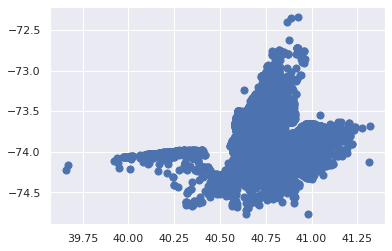

In [ ]:
X = clus.to_numpy()
plt.scatter(X[:, 0], X[:, 1], s=50);

# KMeans Clustering

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.cluster import KMeans

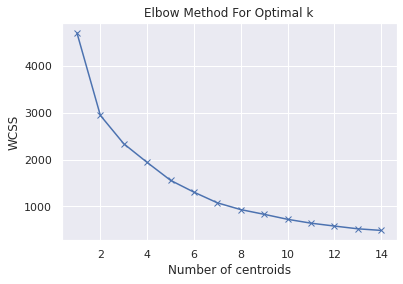

In [ ]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1, 15), wcss, curve="convex", direction="decreasing")
kl.elbow

5

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(clus)
y_kmeans = kmeans.predict(clus)

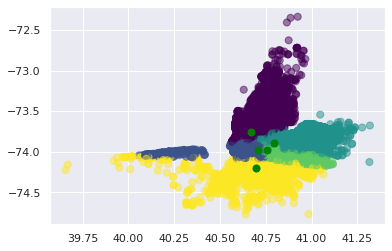

In [ ]:
plt.scatter(clus['Lat'], clus['Lon'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=50)

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
clocation = pd.DataFrame(centers, columns=["Latitude","Longitude"])

In [ ]:
clocation

,Latitude,Longitude
0,40.668698,-73.758171
1,40.708180,-73.985342
2,40.797250,-73.887285
3,40.758122,-73.980906
4,40.696124,-74.199738


In [ ]:
# Converting centroid into lists
centroid = clocation.values.tolist()


In [ ]:
# Plotting the centroids on google map using Folium library.
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 10)
map

In [ ]:
for point in range(0, len(centroid)):
  folium.Marker(
    location=(centroid[point])).add_to(map)

In [ ]:
map

# DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
epsilon = 0.07
minimumSamples = 3
db = DBSCAN(eps=epsilon, min_samples=minimumSamples, algorithm='ball_tree', metric='haversine').fit(X[:3000])
labels = db.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
set(labels)

{-1, 0, 1, 2, 3, 4}

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

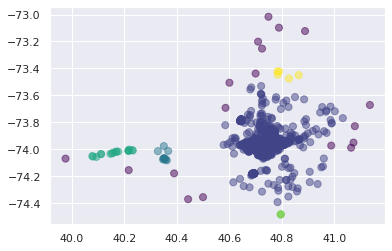

In [ ]:
X1 = X[:3000]
y_db = db.fit_predict(X1)
#plotting the results
plt.scatter(X1[:,0], X1[:,1], c=y_db, s=50, alpha=0.5,cmap='viridis')

In [ ]:
dfdb = pd.DataFrame(X1, columns=[["Lat","Lon"]])

In [ ]:
dfdb["cluster"] = y_db

In [ ]:
dfdb.head()

,Lat,Lon,cluster
0,40.7366,-73.9906,0
1,40.7260,-73.9918,0
2,40.7209,-74.0507,0
3,40.7387,-73.9856,0
4,40.7323,-74.0077,0


In [ ]:
dfdb2 = pd.DataFrame(dfdb.to_numpy(), columns=["Lat","Lon","Cluster"])

In [ ]:
dfdb2.groupby(["Cluster"])["Cluster"].count()

Cluster
-1.0      18
 0.0    2947
 1.0      10
 2.0      17
 3.0       3
 4.0       5
Name: Cluster, dtype: int64

In [ ]:
mapdb = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 7)

In [ ]:
s = range(n_clusters_)
dbcentroids = []
for i in s:
  filter = dfdb2["Cluster"] == i
  clus=dfdb2[filter]
  centroid = clus.mean(axis=0)
  dbcentroids.append([centroid[0],centroid[1]])

In [ ]:
for dbcentro in dbcentroids:
  folium.Marker(location=(dbcentro), icon=folium.Icon(color="red", icon="info-sign")).add_to(mapdb)

In [ ]:
mapdb